# Emissions Model Training with Linear Regression

This file contains the model training for a linear regression model aiming to predict CO2 emissions based on road length and pollution caused by different types of vehicles.

#### Objective:
The objective is to train a linear regression model that predicts CO2 emissions based on road length and pollution caused by different types of vehicles.

#### Input:
The input data consists of the following features:

| Name                   | Description                                 | Column Name           | Data Type |
|------------------------|---------------------------------------------|-----------------------|-----------|
| Borough Name           | Exact borough name                          | BoroughName_ExactCut  | Object    |
| Road Length (m)        | Length of road in meters                    | Length (m)            | Float64   |
| Pollutant              | Amount of pollution caused by vehicles      | Pollutant             | Float64   |
| Petrol Car             | Amount of pollution caused by petrol cars   | PetrolCar             | Float64   |
| Diesel Car             | Amount of pollution caused by diesel cars   | DieselCar             | Float64   |
| Petrol LGV             | Amount of pollution caused by petrol LGVs   | PetrolLgv             | Float64   |
| Diesel LGV             | Amount of pollution caused by diesel LGVs   | DieselLgv             | Float64   |
| Electric Car           | Amount of pollution caused by electric cars | ElectricCar           | Float64   |
| Electric LGV           | Amount of pollution caused by electric LGVs | ElectricLgv           | Float64   |

#### Output:
The trained linear regression model predicts CO2 emissions based on road length pollution caused by different types of vehicles.


### Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Reading the Dataset

In [12]:
excel_file = r'./data/LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx'
df = pd.read_excel(excel_file)

csv_file = './data/End_of_Module_Assignment.csv'
df.to_csv(csv_file, index = False)

print(f"converted {excel_file} to {csv_file}")

converted ./data/LAEI2013_MajorRoads_EmissionsbyLink_2013.xlsx to ./data/End_of_Module_Assignment.csv


In [3]:
file_path= './data/Εnd_of_Module_Assignment.csv'

In [4]:
# Cleaning the data by replacing the blank entries with NA
df['PetrolCar'].replace('-', pd.NA, inplace = True)
df['PetrolLgv'].replace('-', pd.NA, inplace = True)
df['DieselLgv'].replace('-', pd.NA, inplace = True)


In [5]:
# Check if 'Pollutant' column exists in the DataFrame
if 'Pollutant' in df.columns:
    print("Column 'Pollutant' exists.")
else:
    print("Column 'Pollutant' does not exist.")

# Check for any possible typos in the column name
if 'Pollutant' not in df.columns:
    possible_columns = [col for col in df.columns if 'pollutant' in col.lower()]
    print("Possible columns containing 'pollutant':", possible_columns)

# Check for missing values in the 'Pollutant' column
missing_values_count = df['Pollutant'].isnull().sum()
print("Number of missing values in 'Pollutant' column:", missing_values_count)

Column 'Pollutant' exists.
Number of missing values in 'Pollutant' column: 0


In [6]:
unique_pollutants = df['Pollutant'].unique()
# Due the data being non-numeric I had to convert the data by creating a new column in the dataset which added numerical values for the pollutants column
pollutant_mapping = {pollutant: i for i, pollutant in enumerate(unique_pollutants)}

#Map CO2 as a specific numeric value (e.g, 0)
pollutant_mapping['CO2'] = 0
pollutant_mapping['NOx'] = 1
pollutant_mapping['PM10_Brake'] = 2
pollutant_mapping['PM10_Exhaust'] = 3
pollutant_mapping['PM10_Resusp'] =4
pollutant_mapping['PM10_Tyre'] = 5
pollutant_mapping['PM25_Brake'] = 6
pollutant_mapping['PM25_Exhaust'] = 7
pollutant_mapping['PM25_Resusp'] = 8
pollutant_mapping['PM25_Tyre'] = 9

# Create a new column 'Pollutant_Numeric' with mapped values
df['Pollutant_Numeric'] = df['Pollutant'].map(pollutant_mapping)


In [7]:
# Split the data into features (X) and target variable (y) 
X = df.drop('Pollutant_Numeric' , axis=1) #Drops the target column
y = df['Pollutant_Numeric'] #Select the target column name

In [8]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)


In [9]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Initialise and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predict on the test set
y_pred = model.predict(X_test)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.968032376981062e-24


In [10]:
from sklearn.metrics import r2_score
# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)

R2 Score: 1.0


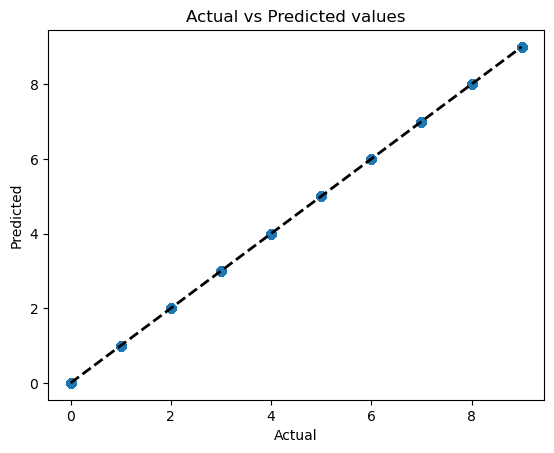

In [11]:
# Plotting the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()